In [2]:
import pandas as pd
import numpy as np
import scipy

from pandas_datareader import data, wb

import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from pandas.tseries.offsets import *

import plotly as py

import plotly.graph_objs as go
import cufflinks as cf

In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2

figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


In [4]:
strategyname = 'strategy_340240'
d, info = matlab.loaddata('../../mat/'+strategyname+'.mat')

df = pd.DataFrame(d.exo)
#df['close'] = d.exo
#df['vol'] = d.volume

In [5]:
for i in range(10,100,10):

    bb_period = i
    bb_k = 2
    df['bb_central_line'+str(i)] = df.exo.rolling(bb_period).mean()
    df['bb_upperband'+str(i)] = df['bb_central_line'+str(i)] + (bb_k * df['bb_central_line'+str(i)].rolling(bb_period).std())
    df['bb_lowerband'+str(i)] = df['bb_central_line'+str(i)] - (bb_k * df['bb_central_line'+str(i)].rolling(bb_period).std())

df['bb_multiperiod_central_line'] = df.filter(like='centr').mean(axis=1)    
df['bb_multiperiod_upperband'] = df.filter(like='upper').mean(axis=1)
df['bb_multiperiod_lowerband'] = df.filter(like='lower').mean(axis=1)

#df = df.drop(df.filter(like='centr').columns, axis=1).drop(df.filter(like='upper').columns, axis=1).drop(df.filter(like='lower').columns, axis=1)

In [6]:
bb_period = 20
bb_k = 2
df['bb_central_line'] = df.exo.rolling(bb_period).mean()
df['bb_upperband'] = df.bb_central_line + (bb_k * df.bb_central_line.rolling(bb_period).std())
df['bb_lowerband'] = df.bb_central_line - (bb_k * df.bb_central_line.rolling(bb_period).std())

df['bb_%b'] = (df.exo - df['bb_lowerband']) / (df['bb_upperband'] - df['bb_lowerband'])
df['bb_width'] = (df['bb_upperband'] - df['bb_lowerband'])

In [7]:
#py.sign_in('tmqr', '8rctfyu197')
py.plotly.sign_in('dmveden', 'rzbs7xw8ft')

##  Uptrend condition became true if  difference between close price and upper band more than its median.

In [8]:
exo = go.Scatter(
    x = df.exo.index,
    y = df.exo,
    name='EXO Price',
    mode = 'line',
    marker = dict(symbol="spline", size=5, color = 'rgba(255, 0, 0, 0.9)'),
    text = df.exo.index
)

bbupper = go.Scatter(
    x = df.bb_upperband.index,
    y = df.bb_upperband,
    name = 'BBands upper band',
    mode = 'lines+markers',
    marker = dict(symbol="hash", size=5, color = 'rgba(0, 255, 0, 0.9)'),
    text = [df.bb_upperband],
    yaxis='y1'
    ) 

uptrend_ind = go.Scatter(
    x = df.bb_upperband.index,
    y = (df.exo - df.bb_upperband),
    name = 'Indicator value',
    #mode = 'lines+markers',
    line = dict(dash="hash", width=3, color = 'rgba(122, 178, 234, 0.9)'),
    #text = df.bb_upperband.values,
    yaxis='y2'
    ) 

uptrend_med = go.Scatter(
    x = df.bb_upperband.index,
    y = (df.exo - df.bb_upperband).rolling(10).median(),
    name = 'Indicator rolling median',
    #mode = 'lines+markers',
    line = dict(dash="dot", width=2, color = 'rgba(7, 94, 90, 0.9)'),
    #text = [df.bb_upperband],
    yaxis='y2'
    ) 


plot = [exo, bbupper, uptrend_ind, uptrend_med]

layout = go.Layout(
    title="Up trend BBands indicator",
    xaxis=dict(type='date', range=[1404172800000, 1431648000000]),
    yaxis1=dict(
        title='EXO Price',
        zeroline=False
    ),
    #yaxis=dict(zeroline=False),
    yaxis2=dict(
        #title='Percentage Rank of b%',
        overlaying='y',
        side='right',
        zeroline=False
    ),
    annotations=[
        dict(
            x='2014-12-09',
            y=-22852,
            xref='x',
            yref='y',
            text='Long signal',
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=50,
            arrowcolor='#58E366'
        ),
        dict(
            x='2014-08-19',
            y=-12000,
            xref='x',
            yref='y',
            text='Short signal',
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-50,
            arrowcolor='#F75353'
        )
    ]

    )
fig = go.Figure(data=plot, layout=layout)

py.offline.init_notebook_mode()
# Plot and embed in ipython notebook!
py.offline.iplot(fig, filename='basic-scatter')

In [9]:
exo = go.Scatter(
    x = df.exo.index,
    y = df.exo,
    name='EXO Price',
    mode = 'line',
    marker = dict(symbol="spline", size=5, color = 'rgba(255, 0, 0, 0.9)'),
    text = df.exo.index
)

bbupper = go.Scatter(
    x = df.bb_lowerband.index,
    y = df.bb_lowerband,
    name = 'BBands lower band',
    mode = 'lines+markers',
    marker = dict(symbol="hash", size=5, color = 'rgba(0, 255, 0, 0.9)'),
    text = [df.bb_upperband],
    yaxis='y1'
    ) 

uptrend_ind = go.Scatter(
    x = df.bb_upperband.index,
    y = (df.bb_lowerband -  df.exo),
    name = 'Indicator value',
    #mode = 'lines+markers',
    line = dict(dash="hash", width=3, color = 'rgba(122, 178, 234, 0.9)'),
    #text = df.bb_upperband.values,
    yaxis='y2'
    ) 

uptrend_med = go.Scatter(
    x = df.bb_lowerband.index,
    y = (df.bb_lowerband -  df.exo).rolling(10).median(),
    name = 'Indicator rolling median',
    #mode = 'lines+markers',
    line = dict(dash="dot", width=2, color = 'rgba(7, 94, 90, 0.9)'),
    #text = [df.bb_upperband],
    yaxis='y2'
    ) 


plot = [exo, bbupper, uptrend_ind, uptrend_med]

layout = go.Layout(
    title="Down trend BBands indicator",
    xaxis=dict(type='date', range=[df[df.index == '2014-09-12'].index[0].value / 1000000, 
                                   df[df.index == '2014-12-24'].index[0].value / 1000000]),
    yaxis1=dict(
        title='EXO Price',
        zeroline=False
    ),
    #yaxis=dict(zeroline=False),
    yaxis2=dict(
        #title='Percentage Rank of b%',
        overlaying='y',
        side='right',
        zeroline=False
    ),
    annotations=[
        dict(
            x='2014-10-23',
            y=-15993,
            xref='x',
            yref='y',
            text='Short signal',
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=50,
            arrowcolor='#F75353'
        )
    ]

    )
fig = go.Figure(data=plot, layout=layout)

py.offline.init_notebook_mode()
# Plot and embed in ipython notebook!
py.offline.iplot(fig, filename='basic-scatter')

In [10]:
exo = go.Scatter(
    x = df.exo.index,
    y = df.exo,
    name='EXO Price',
    mode = 'line',
    marker = dict(symbol="spline", size=5, color = 'rgba(255, 0, 0, 0.9)'),
    text = df.exo.index
)


width_ind = go.Scatter(
    x = df.exo.index,
    y = (df.bb_width.rank(pct=True))*100,
    name = 'Indicator value',
    #mode = 'lines+markers',
    line = dict(dash="hash", width=3, color = 'rgba(122, 178, 234, 0.9)'),
    #text = df.bb_upperband.values,
    yaxis='y2'
    ) 

plot = [exo, width_ind]

layout = go.Layout(
    title="BBands width indicator",
    xaxis=dict(type='date', range=[df[df.index == '2012-09-07'].index[0].value / 1000000, 
                                   df[df.index == '2013-06-10'].index[0].value / 1000000]),
    yaxis1=dict(
        title='EXO Price',
        zeroline=False
    ),
    #yaxis=dict(zeroline=False),
    yaxis2=dict(
        #title='Percentage Rank of b%',
        overlaying='y',
        side='right',
        zeroline=False
    ),
    annotations=[
        dict(
            x='2012-11-02',
            y=18.12,
            xref='x',
            yref='y2',
            text='Volatility burst signal',
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=50,
            arrowcolor='#F75353'
        )
    ],
    shapes=[dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=90,
            y1=90,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
           dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=50,
            y1=50,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
            dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=10,
            y1=10,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
            dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=20,
            y1=20,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
            dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=80,
            y1=80,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                )
           ]

    )
fig = go.Figure(data=plot, layout=layout)

py.offline.init_notebook_mode()
# Plot and embed in ipython notebook!
py.offline.iplot(fig, filename='basic-scatter')

In [11]:
exo = go.Scatter(
    x = df.exo.index,
    y = df.exo,
    name='EXO Price',
    mode = 'line',
    marker = dict(symbol="spline", size=5, color = 'rgba(255, 0, 0, 0.9)'),
    text = df.exo.index
)


bpct_ind = go.Scatter(
    x = df.exo.index,
    y = (df['bb_%b'].rank(pct=True))*100,
    name = 'Indicator value',
    #mode = 'lines+markers',
    line = dict(dash="hash", width=3, color = 'rgba(122, 178, 234, 0.9)'),
    #text = df.bb_upperband.values,
    yaxis='y2'
    ) 

plot = [exo, bpct_ind]

layout = go.Layout(
    title="BBands b% indicator",
    xaxis=dict(type='date', range=[df[df.index == '2013-11-21'].index[0].value / 1000000, 
                                   df[df.index == '2014-11-10'].index[0].value / 1000000]),
    yaxis1=dict(
        title='EXO Price',
        zeroline=False
    ),
    #yaxis=dict(zeroline=False),
    yaxis2=dict(
        #title='Percentage Rank of b%',
        overlaying='y',
        side='right',
        zeroline=False
    ),
    annotations=[
        dict(
            x='2014-04-21',
            y=95,
            xref='x',
            yref='y2',
            text='Long signal',
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-50,
            arrowcolor='#58E366'
        ),
        dict(
            x='2014-08-21',
            y=0.18,
            xref='x',
            yref='y2',
            text='Short signal',
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=50,
            arrowcolor='#F75353'
        )
    ],
    shapes=[dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=90,
            y1=90,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
           dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=50,
            y1=50,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
            dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=10,
            y1=10,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
            dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=20,
            y1=20,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                ),
            dict(
            type='line',
            x0=df.exo.index[0],
            x1=df.exo.index[-1],
            y0=80,
            y1=80,
            line=dict(dash="dash", width=1, color = 'rgba(7, 94, 90, 0.7)'),
            xref='x',
            yref='y2'
                )
           ]

    )
fig = go.Figure(data=plot, layout=layout)

py.offline.init_notebook_mode()
# Plot and embed in ipython notebook!
py.offline.iplot(fig, filename='basic-scatter')

In [12]:
pd.concat([df.exo, df.filter(like='upper')], axis=1).iplot()

In [14]:
pd.concat([df.exo, df.filter(like='lower')], axis=1).iplot()

In [15]:
df['bb_multiperiod_central_line'] = df.filter(like='centr').mean(axis=1)    
df['bb_multiperiod_upperband'] = df.filter(like='upper').mean(axis=1)
df['bb_multiperiod_lowerband'] = df.filter(like='lower').mean(axis=1)

df['bb_multiperiod_%b'] = (df.exo - df['bb_multiperiod_lowerband']) / (df['bb_multiperiod_upperband'] - df['bb_multiperiod_lowerband'])
df['bb_multiperiod_width'] = (df['bb_multiperiod_upperband'] - df['bb_multiperiod_lowerband'])

In [16]:
pd.concat([df.exo, df['bb_multiperiod_central_line'], df['bb_multiperiod_upperband'], df['bb_multiperiod_lowerband']], axis=1).iplot()

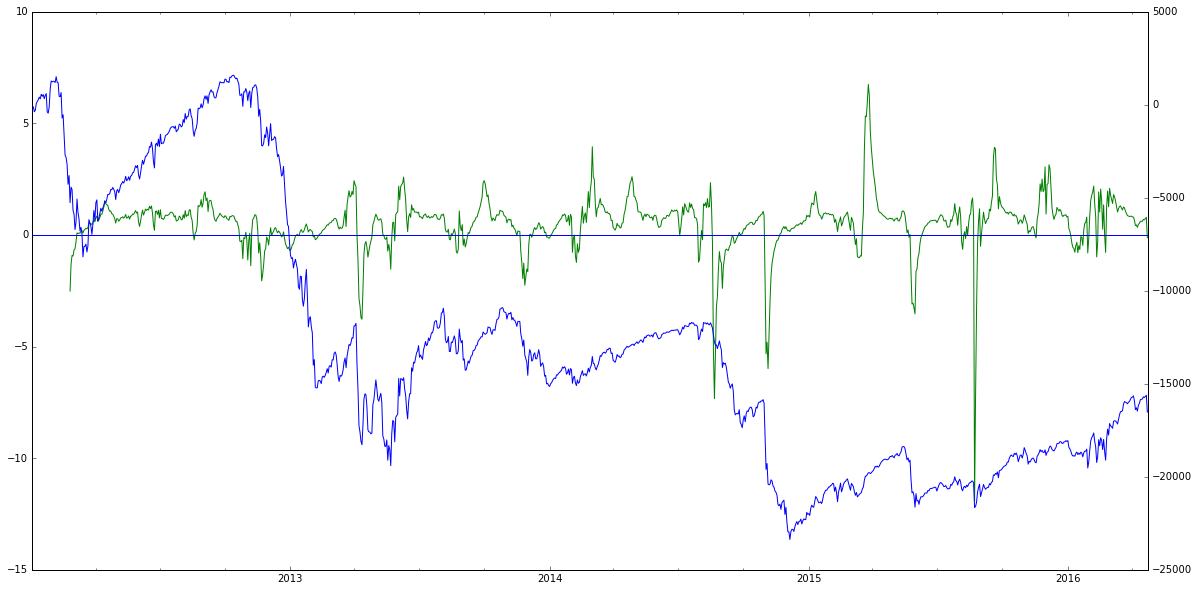

In [30]:
df.exo.plot(secondary_y=True)
df['bb_%b'].plot()


axhline(y=-7000)

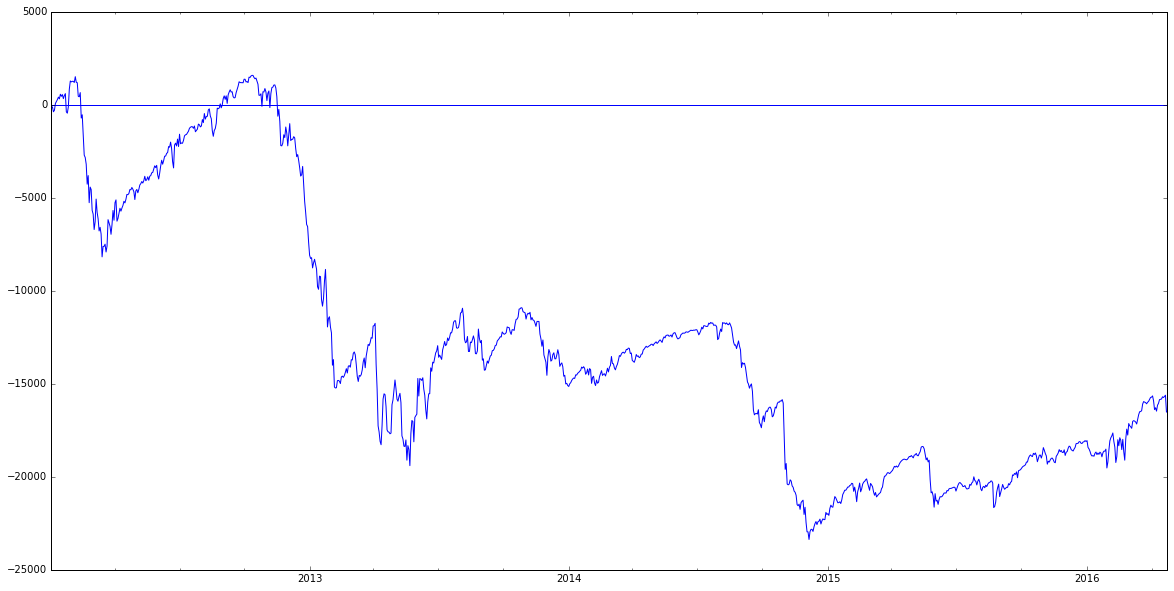

In [20]:
df.exo.plot()
axhline(y=0.5)

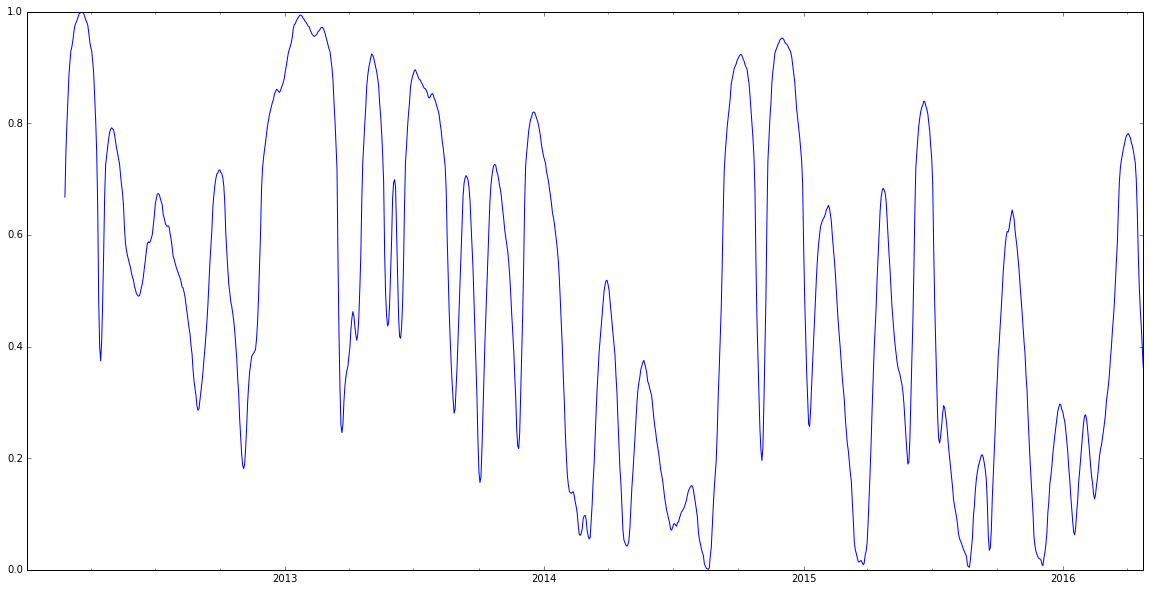

In [54]:
from sklearn import preprocessing
#pd.Series(preprocessing.scale(df.bb_width.dropna()), index=df.bb_width.dropna().index).plot()
df.bb_width.rank(pct=True).plot()
#axhline(y=0.5)

# Patterns

In [65]:
up_trend = (((df.exo - df.bb_upperband).rolling(10).median()) <= (df.exo - df.bb_upperband))

down_trend = (df.bb_lowerband -  df.exo).rolling(10).median()  <= (df.bb_lowerband -  df.exo)

bb_width_pctrank_less_20 = df.bb_width.rank(pct=True) <= 0.2
bb_width_pctrank_less_10 = df.bb_width.rank(pct=True) <= 0.1

bb_width_pctrank_more_80 = df.bb_width.rank(pct=True) >= 0.8
bb_width_pctrank_more_90 = df.bb_width.rank(pct=True) <= 0.9

bb_width_pctrank_more_50 = df.bb_width.rank(pct=True) >= 0.5
bb_width_pctrank_less_50 = df.bb_width.rank(pct=True) <= 0.5

bb_pctb_pctrank_less_20 = df['bb_%b'].rank(pct=True) <= 0.2
bb_pctb_pctrank_less_10 = df['bb_%b'].rank(pct=True) <= 0.1

bb_pctb_pctrank_more_80 = df['bb_%b'].rank(pct=True) >= 0.8
bb_pctb_pctrank_more_90 = df['bb_%b'].rank(pct=True) <= 0.9

bb_pctb_pctrank_more_50 = df['bb_%b'].rank(pct=True) >= 0.5
bb_pctb_pctrank_less_50 = df['bb_%b'].rank(pct=True) <= 0.5

In [66]:
multiperiod_up_trend = ((df.exo - df.bb_multiperiod_upperband).rolling(10).median()) <= (df.exo - df.bb_multiperiod_upperband)

multiperiod_down_trend = (df.bb_multiperiod_lowerband -  df.exo).rolling(10).median()  <= (df.bb_multiperiod_lowerband -  df.exo)

bb_multiperiod_width_pctrank_less_20 = df.bb_multiperiod_width.rank(pct=True) <= 0.2
bb_multiperiod_width_pctrank_less_10 = df.bb_multiperiod_width.rank(pct=True) <= 0.1

bb_multiperiod_width_pctrank_more_80 = df.bb_multiperiod_width.rank(pct=True) >= 0.8
bb_multiperiod_width_pctrank_more_90 = df.bb_multiperiod_width.rank(pct=True) <= 0.9

bb_multiperiod_width_pctrank_more_50 = df.bb_multiperiod_width.rank(pct=True) >= 0.5
bb_multiperiod_width_pctrank_less_50 = df.bb_multiperiod_width.rank(pct=True) <= 0.5

bb_multiperiod_pctb_pctrank_less_20 = df['bb_multiperiod_%b'].rank(pct=True) <= 0.2
bb_multiperiod_pctb_pctrank_less_10 = df['bb_multiperiod_%b'].rank(pct=True) <= 0.1

bb_multiperiod_pctb_pctrank_more_80 = df['bb_multiperiod_%b'].rank(pct=True) >= 0.8
bb_multiperiod_pctb_pctrank_more_90 = df['bb_multiperiod_%b'].rank(pct=True) <= 0.9

bb_multiperiod_pctb_pctrank_more_50 = df['bb_multiperiod_%b'].rank(pct=True) >= 0.5
bb_multiperiod_pctb_pctrank_less_50 = df['bb_multiperiod_%b'].rank(pct=True) <= 0.5

bb_multiperiod_pctb_up_direction = (df['bb_multiperiod_%b'].rank(pct=True).rolling(10).mean() >= 
                                    df['bb_multiperiod_%b'].rank(pct=True).rolling(10).mean().rolling(10).median()) 

bb_multiperiod_pctb_down_direction = (df['bb_multiperiod_%b'].rank(pct=True).rolling(10).mean() <= 
                                    df['bb_multiperiod_%b'].rank(pct=True).rolling(10).mean().rolling(10).median())

In [67]:
d

exo  fut_price  volume  bb_central_line10  bb_upperband10  \
2012-01-03   -187.50  163325.00   37036                NaN             NaN   
2012-01-04   -106.25  163125.00   55765                NaN             NaN   
2012-01-05   -375.00  162175.00   68452                NaN             NaN   
2012-01-06   -293.75  162412.50   58062                NaN             NaN   
2012-01-09     75.00  162775.00   32675                NaN             NaN   
2012-01-10    175.00  162850.00   40222                NaN             NaN   
2012-01-11    281.25  162762.50   47650                NaN             NaN   
2012-01-12    412.50  163000.00   50352                NaN             NaN   
2012-01-13    318.75  162600.00   59615                NaN             NaN   
2012-01-16    568.75  162950.00   29509             86.875             NaN   
2012-01-17    456.25  162812.50   55331            151.250             NaN   
2012-01-18    550.00  162800.00   57828            216.875             NaN   
2012-01-19    331.25  162037.50   83957            287.500             NaN   
2012-01-20    500.00  162487.50   69900            366.875             NaN   
2012-01-23    600.00  162462.50   62880            419.375             NaN   
2012-01-24   -381.25  160900.00   99953            363.750             NaN   
2012-01-25   -450.00  160937.50  120976            290.625             NaN   
2012-01-26   -112.50  161462.50   84827            238.125             NaN   
2012-01-27    843.75  162975.00  110392            290.625      494.044935   
2012-01-30   1281.25  163975.00   75158            361.875      524.894948   
2012-01-31   1231.25  164025.00   67844            439.375      587.771522   
2012-02-01   1262.50  163925.00   62388            510.625      676.913112   
2012-02-02   1262.50  164275.00   48394            603.750      823.193108   
2012-02-03   1200.00  163275.00   85665            673.750      956.460744   
2012-02-06   1512.50  163400.00   55961            765.000     1122.443177   
2012-02-07   1212.50  162575.00   68047            924.375     1381.141660   
2012-02-08   1187.50  162325.00   80403           1088.125     1642.794900   
2012-02-09    456.25  161012.50   81402           1145.000     1739.415621   
2012-02-10    431.25  161137.50   74214           1103.750     1683.565958   
2012-02-13    656.25  161250.00   51364           1041.250     1569.870716   
...              ...        ...     ...                ...             ...   
2016-03-15 -16662.50  108712.50  125167         -17075.625   -16392.435533   
2016-03-16 -16500.00  108081.25   82179         -17000.000   -16351.160906   
2016-03-17 -16493.75  110387.50  259756         -16918.125   -16321.837819   
2016-03-18 -16443.75  110168.75  109461         -16823.125   -16278.531051   
2016-03-21 -16093.75  109918.75   57477         -16730.625   -16245.433439   
2016-03-22 -15956.25  109306.25  103509         -16628.125   -16168.694325   
2016-03-23 -15981.25  109137.50   92962         -16525.625   -16035.716261   
2016-03-24 -16012.50  108987.50   85417         -16421.250   -15890.451270   
2016-03-25 -16075.00  108412.50     518         -16312.500   -15752.307495   
2016-03-28 -15993.75  108375.00   43221         -16221.250   -15634.134286   
2016-03-29 -15943.75  108875.00  102429         -16149.375   -15557.501855   
2016-03-30 -15837.50  109118.75   96707         -16083.125   -15501.254975   
2016-03-31 -15731.25  109143.75   86993         -16006.875   -15443.931641   
2016-04-01 -15718.75  109843.75  128428         -15934.375   -15395.083589   
2016-04-04 -15650.00  110475.00   90488         -15890.000   -15387.303728   
2016-04-05 -15912.50  111418.75  175042         -15885.625   -15436.126900   
2016-04-06 -16387.50  112062.50  155648         -15926.250   -15549.561003   
2016-04-07 -16287.50  113593.75  228407         -15953.750   -15655.787911   
2016-04-08 -16468.75  113300.00  145525         -15993.125   -15766.906079   
2016-04-11 -16150.00  113693.75  118294

In [37]:
np.arange(10)[:5]

array([0, 1, 2, 3, 4])

In [38]:
np.arange(10)[5:]

array([5, 6, 7, 8, 9])